In [6]:
import sys

sys.path.append("..")

from typing import List, Tuple
import pandas as pd
from ct.utils import normalize_hu, read_dcm
from covid_ct.gen_data import process_lung
from utils.plot import plot_grid
from tqdm import tqdm

df = pd.read_pickle("../output/covid_ct_train_meta.pkl")
items: List[Tuple[Tuple[str, ...], Tuple[str, ...]]] = df[
    ["lung", "localizer"]
].values.tolist()

images = []

for idx, (lung_paths, loc_paths) in tqdm(list(enumerate(items[100:110]))):
    lung_sitk, lung_3d = read_dcm(list(lung_paths))

    # Get lung, localizer, body, bones, soft
    lung_3d = normalize_hu(lung_3d)
    loc_2d = normalize_hu(read_dcm(list(loc_paths))[1][0])
    raw_2d, loc_cropped_2d, body_2d, soft_2d, bones_2d = process_lung(lung_3d, loc_2d)

    # Get lung, localizer, body, bones, drr
    images.append([raw_2d, body_2d, soft_2d, bones_2d])


100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


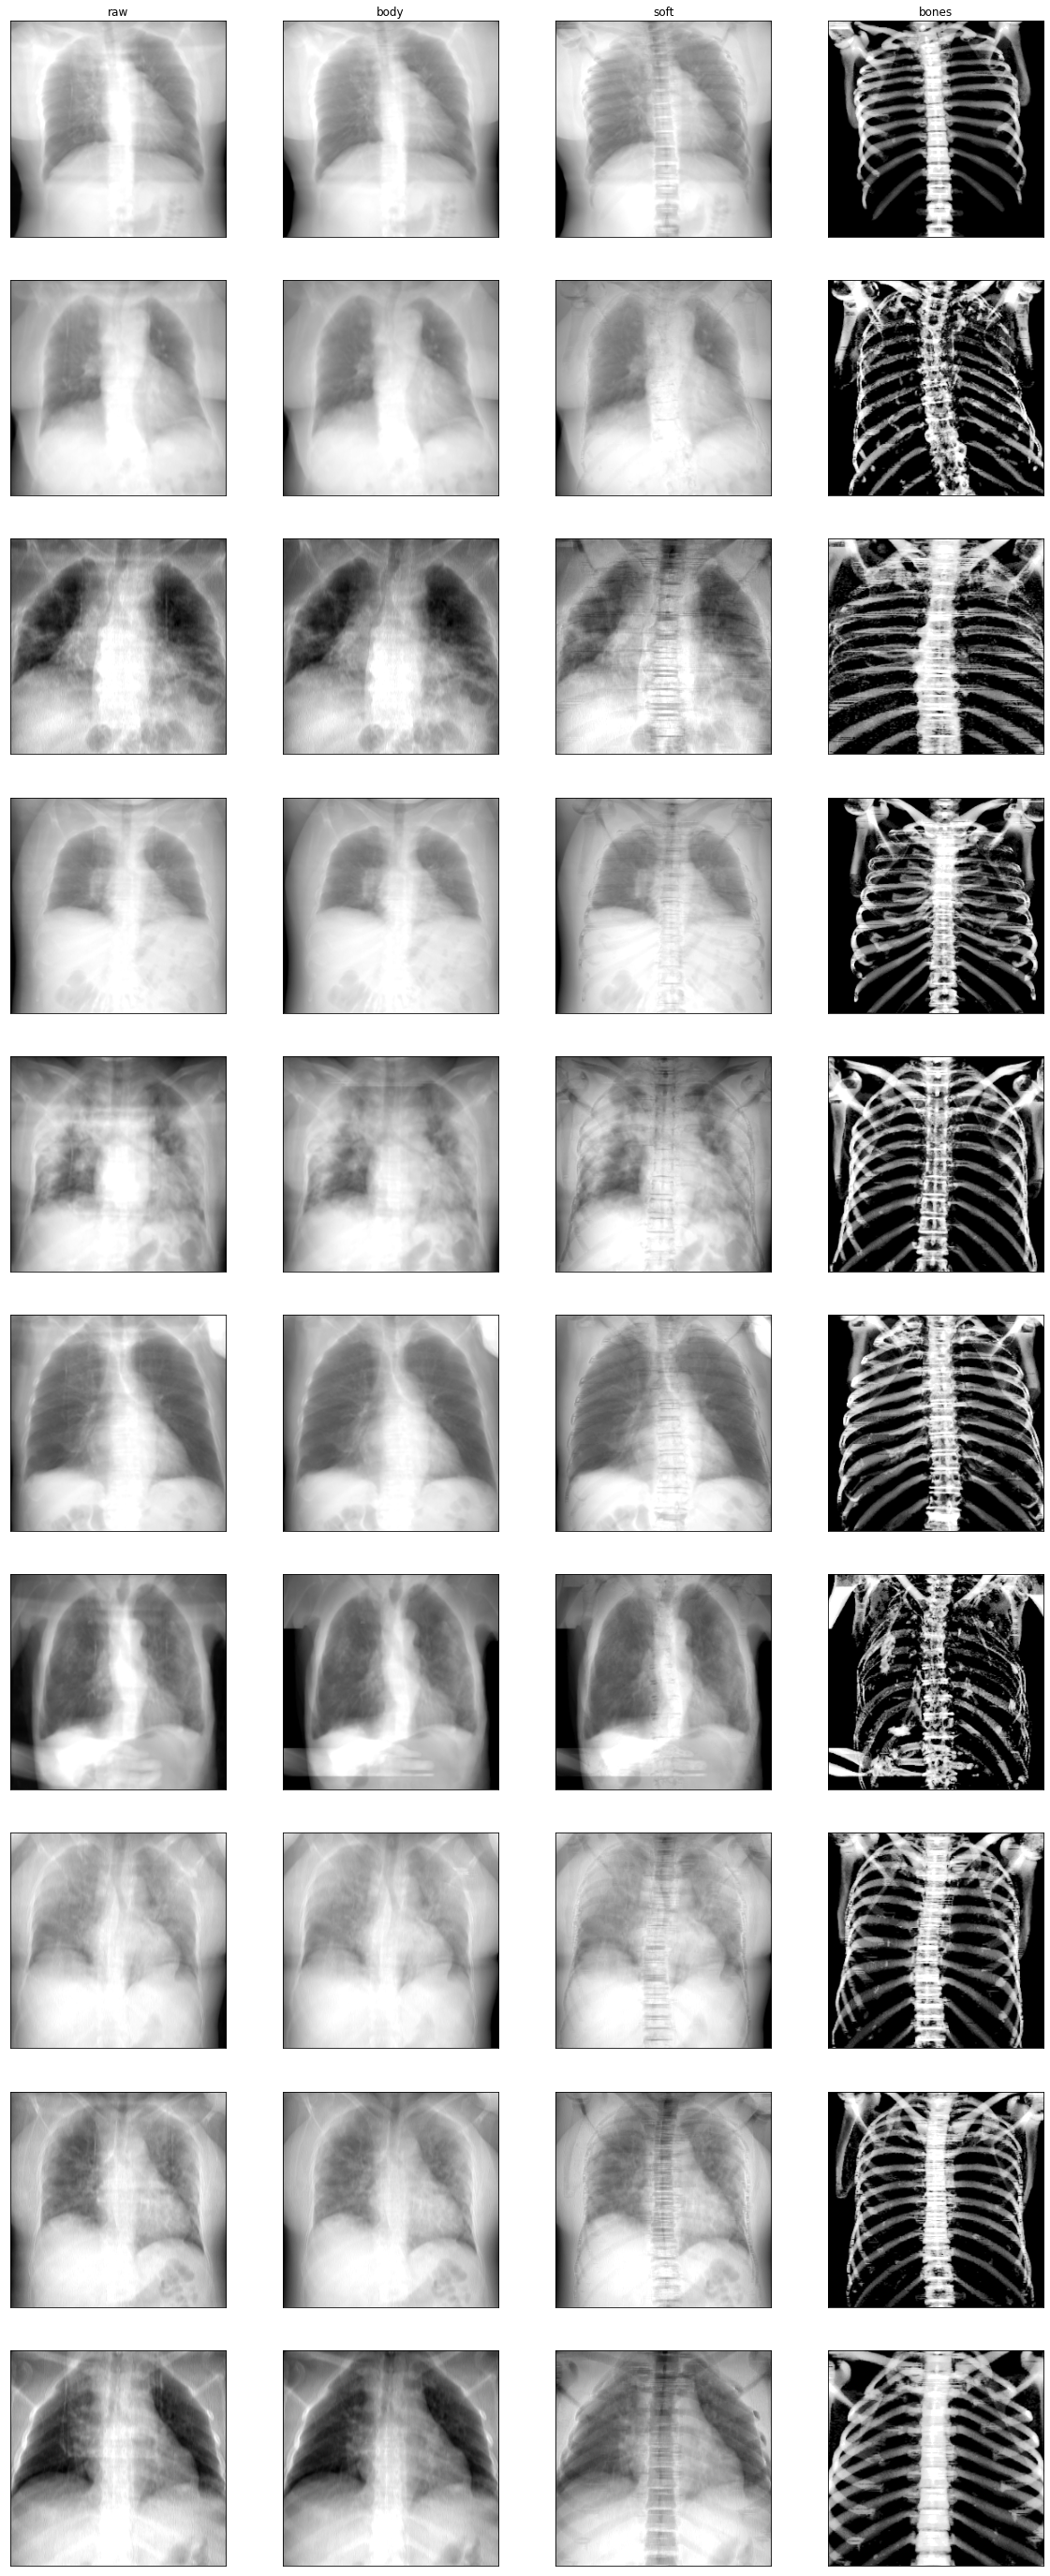

In [7]:
plot_grid(images, ["raw", "body", "soft", "bones"])